# Dataset Integration

### Library loading

In [1]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd
from scipy import sparse
from anndata import AnnData
from matplotlib import pylab
import warnings
import yaml
import os
import matplotlib as plt

warnings.filterwarnings('ignore')

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
with open("../data/resources/rcParams.yaml") as f:
    rcParamsDict = yaml.full_load(f)
    for k in rcParamsDict["rcParams"]:
        print("{} {}".format(k,rcParamsDict["rcParams"][k]))
        plt.rcParams[k] = rcParamsDict["rcParams"][k]
    for k1 in set(list(rcParamsDict)).difference(set(["rcParams"])):
        print("{} {}".format(k1,rcParamsDict[k1]))

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.22.2 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.3
figure.dpi 50
savefig.dpi 500
figure.figsize [10, 10]
axes.facecolor white
dotSize 20


### Configure paths

In [3]:
outdir = "../data/output"


with open("../data/resources/iPSC_lines_map.yaml", 'r') as f:
    iPSC_lines_map = yaml.load(f, Loader=yaml.FullLoader)["lines"]

## Non integrated Datasets 

In [4]:
Multiplexing = sc.read_h5ad(outdir+'/adatas/MultiplexingPreprocessing_unscaled.h5ad')

In [5]:
#Multiplexing = Multiplexing.raw.to_adata()

In [6]:
Multiplexing.var["highly_variable"].sum()

3499

In [7]:
#sc.pp.normalize_total(Multiplexing, target_sum=1e6, exclude_highly_expressed=True, max_fraction=.1)
sc.pp.normalize_total(Multiplexing)

normalizing counts per cell
    finished (0:00:00)


In [8]:
sc.pp.log1p(Multiplexing)

In [9]:
Multiplexing.raw = Multiplexing

In [10]:
Multiplexing = Multiplexing[:, Multiplexing.var.highly_variable]

In [11]:
sc.pp.regress_out(Multiplexing, ['total_counts','pct_counts_mt'], n_jobs=4)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:23)


In [12]:
sc.pp.scale(Multiplexing)

In [13]:
sc.tl.pca(Multiplexing, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


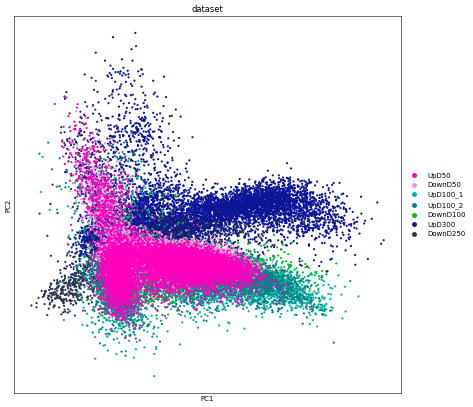

In [14]:
sc.pl.pca(Multiplexing, color=['dataset'], size = 40)

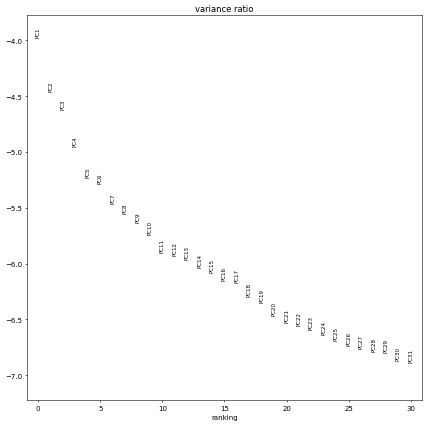

In [15]:
sc.pl.pca_variance_ratio(Multiplexing, log=True)

In [16]:
sc.pp.neighbors(Multiplexing, n_neighbors=20, n_pcs=7)

computing neighbors
    using 'X_pca' with n_pcs = 7
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [17]:
sc.tl.umap(Multiplexing)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


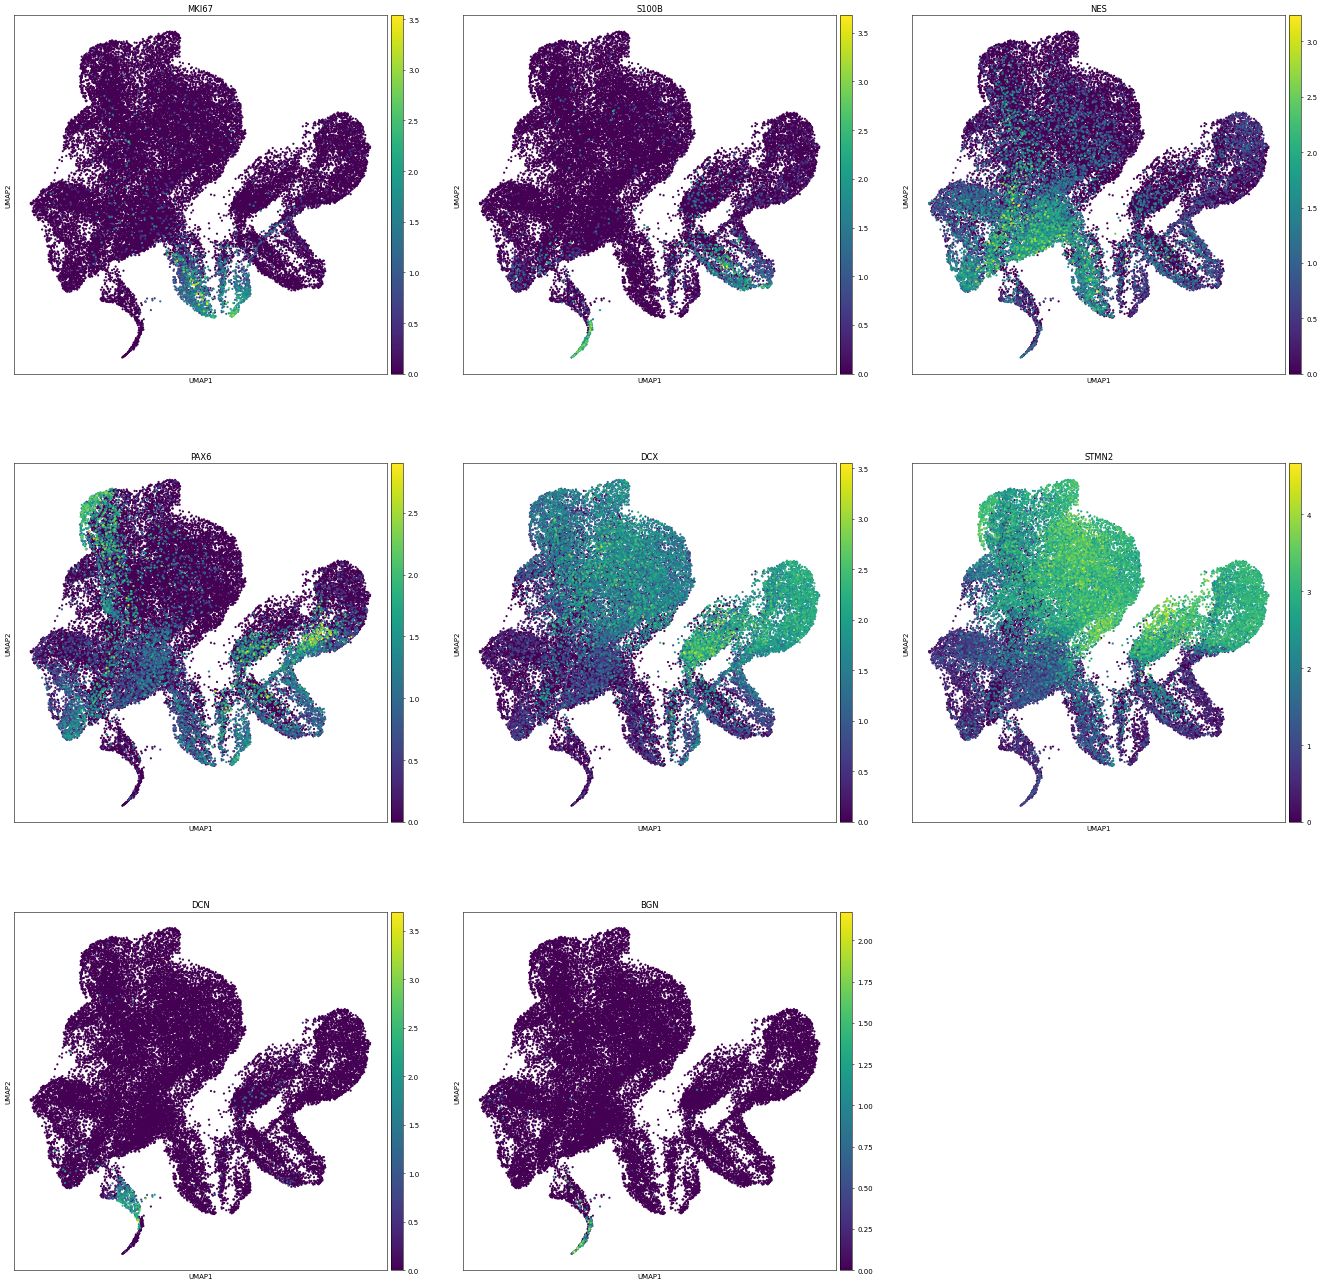

In [18]:
sc.pl.umap(Multiplexing, color=['MKI67', 'S100B',"NES","PAX6","DCX",'STMN2',"DCN", "BGN"], ncols=3, size =40)

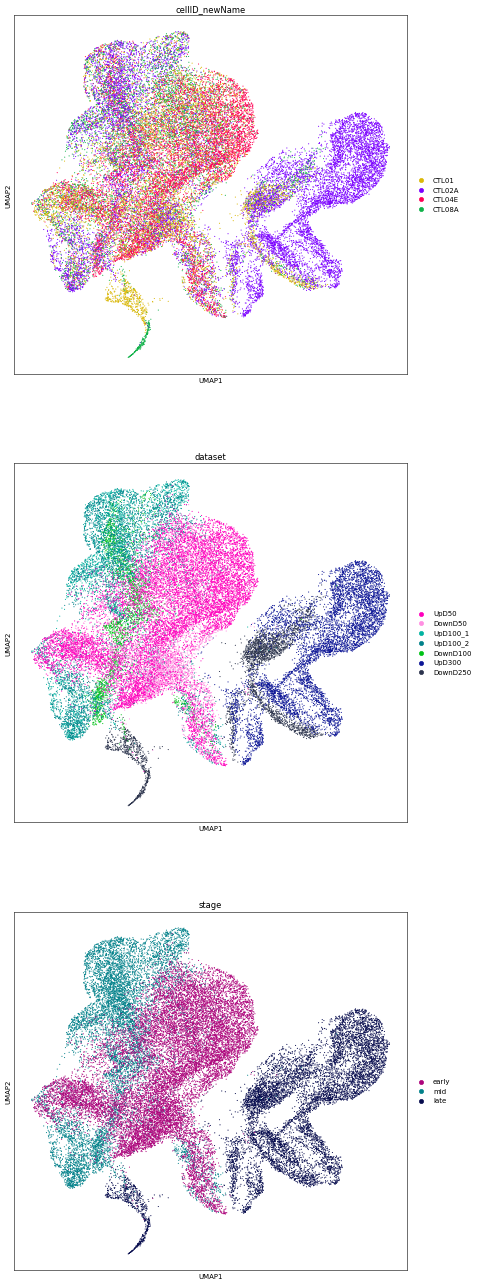

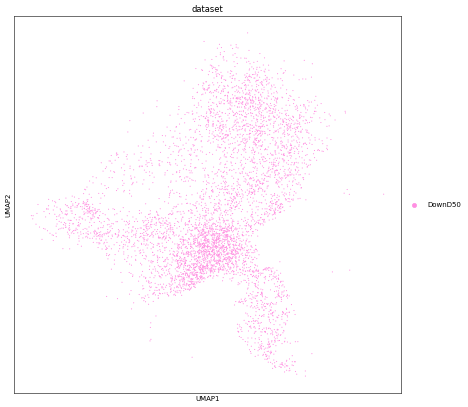

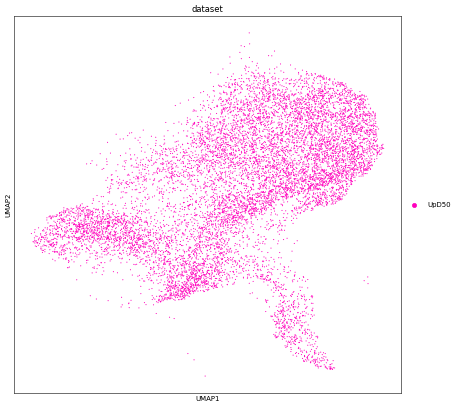

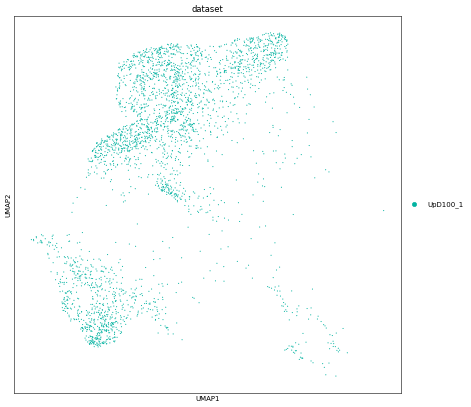

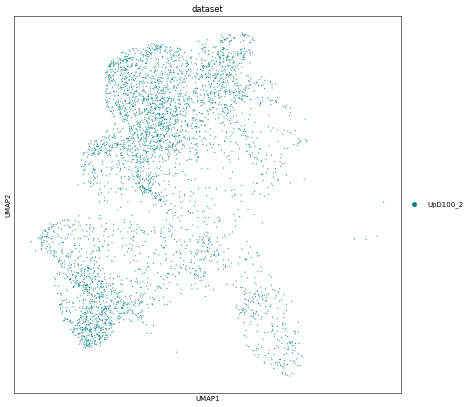

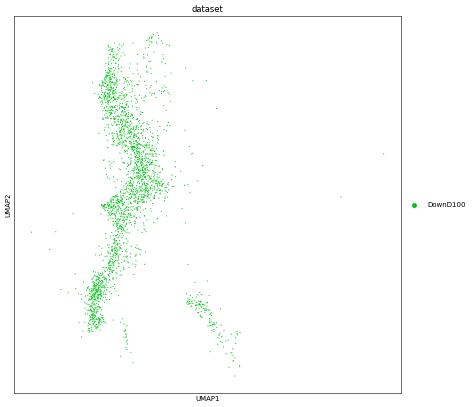

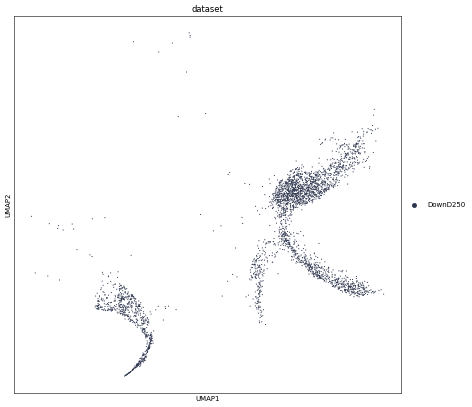

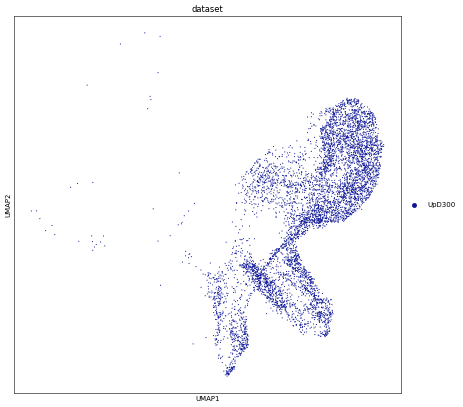

In [19]:
sc.pl.umap(Multiplexing, color=["cellID_newName","dataset","stage"],ncols=1, size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "DownD50")], color='dataset', size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "UpD50")], color='dataset' , size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "UpD100_1")], color='dataset', size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "UpD100_2")], color='dataset', size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "DownD100")], color='dataset', size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "DownD250")], color='dataset', size=10)
sc.pl.umap(Multiplexing[(Multiplexing.obs.dataset == "UpD300")], color='dataset', size=10)



In [20]:
Multiplexing.obs["dataset"].value_counts()

UpD50       10586
UpD300       6240
DownD50      5027
UpD100_2     3930
DownD250     3035
UpD100_1     2971
DownD100     2460
Name: dataset, dtype: int64

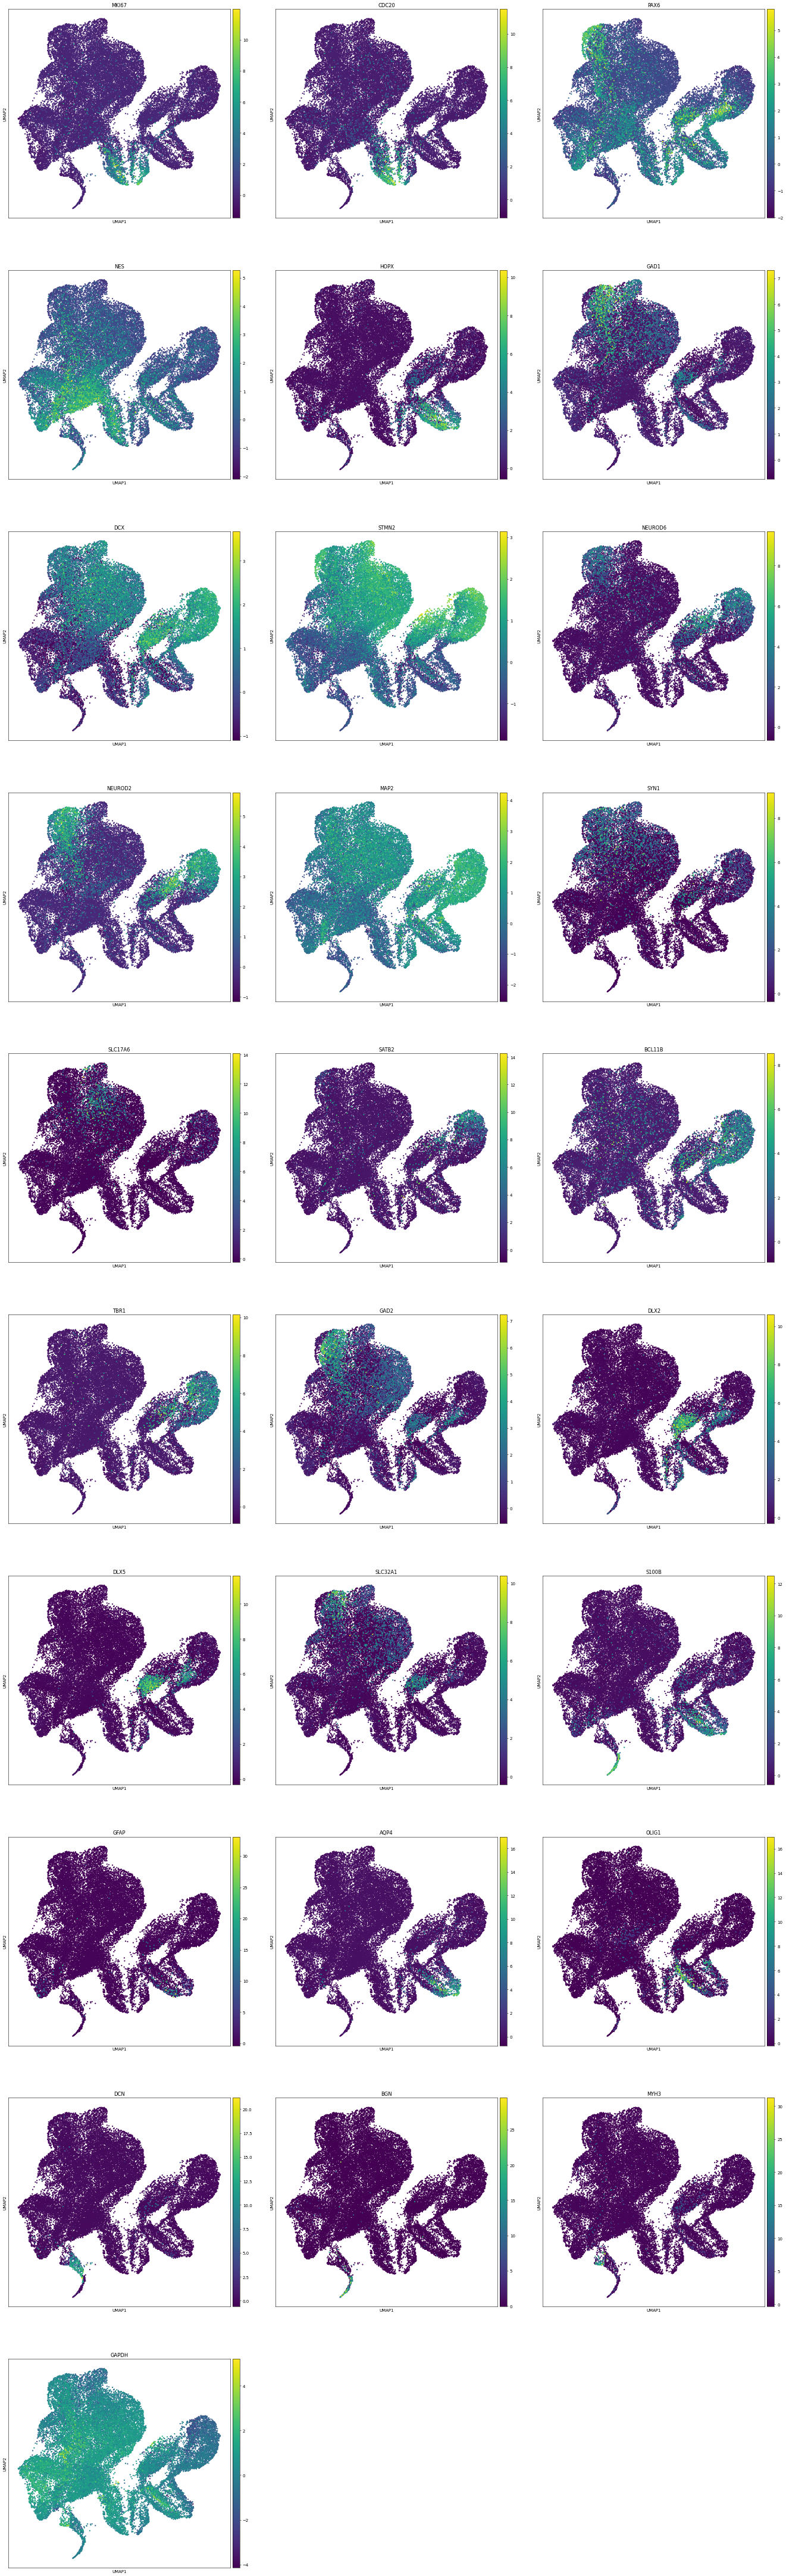

In [21]:
genes = pd.array(["MKI67","CDC20","PAX6","NES","HOPX","GAD1","DCX","STMN2","NEUROD6","NEUROD2","MAP2","SYN1","SLC17A6", "SATB2","BCL11B","TBR1", "GAD2","DLX2","DLX5","SLC32A1","S100B", "GFAP", "AQP4", "OLIG1","DCN", "BGN", "MYH3", "GAPDH"], dtype="category")

sc.pl.umap(Multiplexing,color= genes[genes.isin(Multiplexing.var_names) ], ncols=3, size=40, use_raw=False)


## Cleaning from dimreducts and neighbors

In [22]:
del Multiplexing.obsm
del Multiplexing.varm
del Multiplexing.obsp

for unsKey in [k for k in list(Multiplexing.uns.keys()) if "_colors"  not in k]:
    del Multiplexing.uns[unsKey]
    
Multiplexing

AnnData object with n_obs × n_vars = 34249 × 3499
    obs: 'dataset', 'cellID', 'cellID_newName', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'stage', 'type', 'id_stage', 'cellID_newName_type'
    var: 'highly_variable', 'mean', 'std'
    uns: 'cellID_colors', 'cellID_newName_colors', 'cellID_newName_type_colors', 'dataset_colors', 'stage_colors', 'type_colors'

In [23]:
Multiplexing.write(outdir+"/adatas/MultiplexingPreprocessing_JoinScale.h5ad")